### Plotting Data on NE30 Native Grid<a id="top"></a>


This notebook shows how to plot NE30 (or NEX) native grids

© Software was developed by Charles Doutriaux. (April 2018)

## Table Of Contents

* [necessary modules for this notebook](#modules)
* [download necessary files](#download)
* [read grid data](#read_grid)
* [generate MPAS grid](#grid)
* [load data and apply grid](#data)
* [plot the data](#plot)

## Necessary Modules<a id="modules"></a>
[Back to Top](#top)

In [1]:
from __future__ import print_function
import e3sm_nex
import cdms2
import vcs
import requests
import numpy

Allow anonymous logging usage to help improve CDAT(you can also set the environment variable CDAT_ANONYMOUS_LOG to yes or no)? [yes]/no: no


## Download Data<a id="download"></a>
[Back to Top](#top)

In [2]:
def download(fnm):
    r = requests.get("https://cdat.llnl.gov/cdat/sample_data/%s" % fnm,stream=True)
    with open(fnm,"wb") as f:
        for chunk in r.iter_content(chunk_size=1024):
            if chunk:  # filter local_filename keep-alive new chunks
                f.write(chunk)
                
for filename in ["ne30_TS.nc","ne30np4_latlon.091226.nc"]:
    download(filename)
    
    
data_path = "ne30_TS.nc"
grid_file_path = "ne30np4_latlon.091226.nc"

## Grid Info<a id="read_grid"></a>
[Back to Top](#top)

In [3]:
# Reads in data from grid file
gf = cdms2.open(grid_file_path)

# needs to send filled data
lats = gf("lat").filled()
lons = gf("lon").filled()
ec = gf("element_corners").filled()

## Generate NE30 Grid<a id="grid"></a>
[Back to Top](#top)

In [4]:
# Generate grid
grid = e3sm_nex.generateNEXGrid(lats, lons, ec)

## Load Data and Apply Grid<a id="data"></a>
[Back to Top](#top)

In [5]:
# Load data and apply grid
fd = cdms2.open(data_path)
data = fd("TS")
# Need to clean up missing/bad values
data = e3sm_nex.applyGrid(data,grid)

## Plot<a id="plot"></a>
[Back to Top](#top)

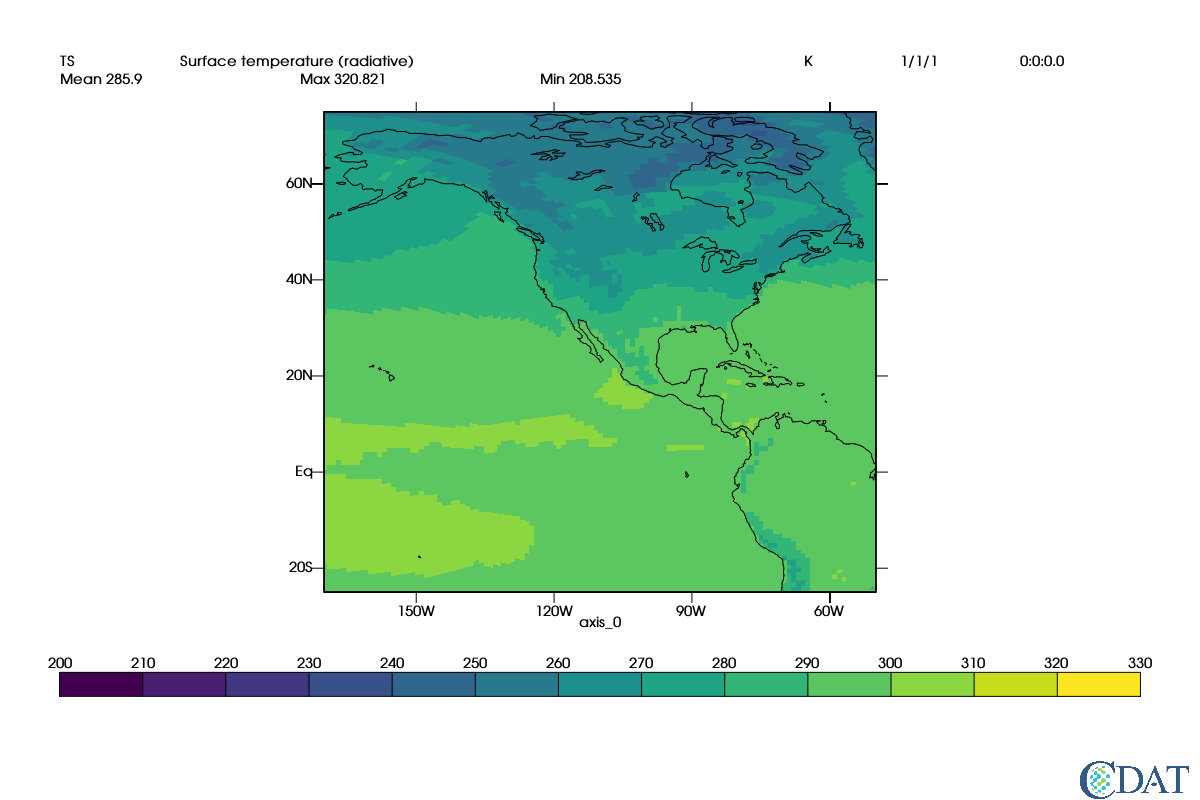

In [8]:
# plot
# create Canvas
x=vcs.init(bg=True, geometry=(1200,800))

# Create graphics method
mesh = vcs.createmeshfill()

# Only show a sub domain
mesh.datawc_x1 = -170
mesh.datawc_x2 = -50
mesh.datawc_y1 = -25
mesh.datawc_y2 = 75

# If you want to show mesh
#mesh.mesh = True

x.plot(data, mesh, ratio="autot")

In [40]:
# Load data and apply grid
fd = cdms2.open(data_path)
data = fd("TS")
# Need to clean up missing/bad values
data = e3sm_nex.applyGrid(data,grid)
#data.info()
print("grid.shape",grid.shape)
dt = data.data
print (help(data))
print ("dim0",dt[0,0:3])
print ("dim1",dt[1,0:3])
print ("dim2",dt[2,0:3])
#y = data[:,0,:]
#x = data[:,1,:]
print ("dt",dt.shape)
#help(grid)

grid.shape (48602,)
Help on TransientVariable in module cdms2.tvariable object:

class TransientVariable(cdms2.avariable.AbstractVariable, numpy.ma.core.MaskedArray)
 |  An in-memory variable.
 |  
 |  Method resolution order:
 |      TransientVariable
 |      cdms2.avariable.AbstractVariable
 |      cdms2.cdmsobj.CdmsObj
 |      cdms2.slabinterface.Slab
 |      numpy.ma.core.MaskedArray
 |      numpy.ndarray
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __abs__(self)
 |  
 |  __add__(self, other)
 |  
 |  __array_finalize__(self, obj)
 |      Finalizes the masked array.
 |  
 |  __copy__(self)
 |  
 |  __div__(self, other)
 |  
 |  __eq__(self, other)
 |      Return self==value.
 |  
 |  __floordiv__(self, other)
 |  
 |  __ge__(self, other)
 |      Return self>=value.
 |  
 |  __gt__(self, other)
 |      Return self>value.
 |  
 |  __iadd__(self, other)
 |      Add other to self in place.
 |  
 |  __idiv__(self, other)
 |      Divide self by other in place.
 |  
 | 

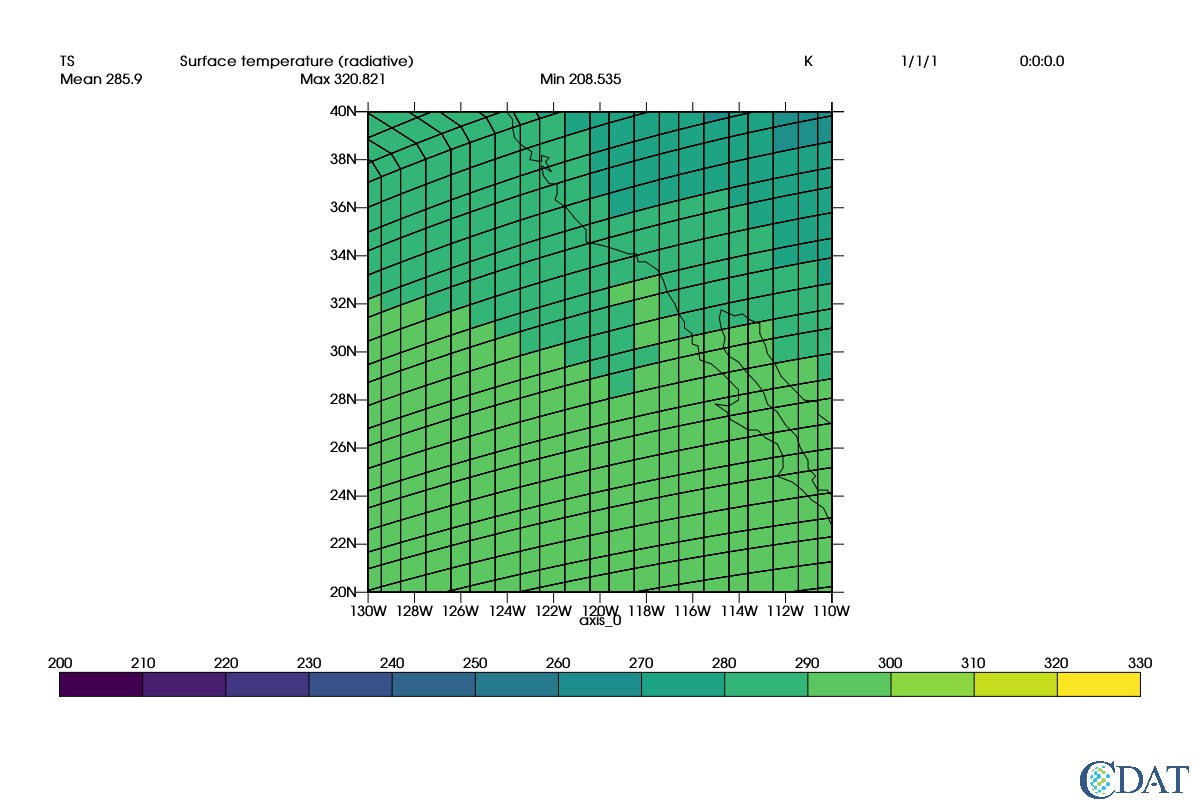

In [12]:
# plot
# create Canvas
x=vcs.init(bg=True, geometry=(1200,800))

# Create graphics method
mesh = vcs.createmeshfill()

# Only show a sub domain
mesh.datawc_x1 = -130
mesh.datawc_x2 = -110
mesh.datawc_y1 = 20
mesh.datawc_y2 = 40

# If you want to show mesh
mesh.mesh = True

x.plot(data, mesh, ratio="autot")